Task - 05

Problem Statement - Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [188]:
df = pd.read_csv("C:/Users/syona/OneDrive/Documents/ProdigyInfotech/Accidents_Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [145]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [146]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [147]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [149]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [150]:
df = df.drop(['Time','Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'], axis=1)

In [151]:
df.duplicated().sum()

0

In [152]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [153]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [154]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [155]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

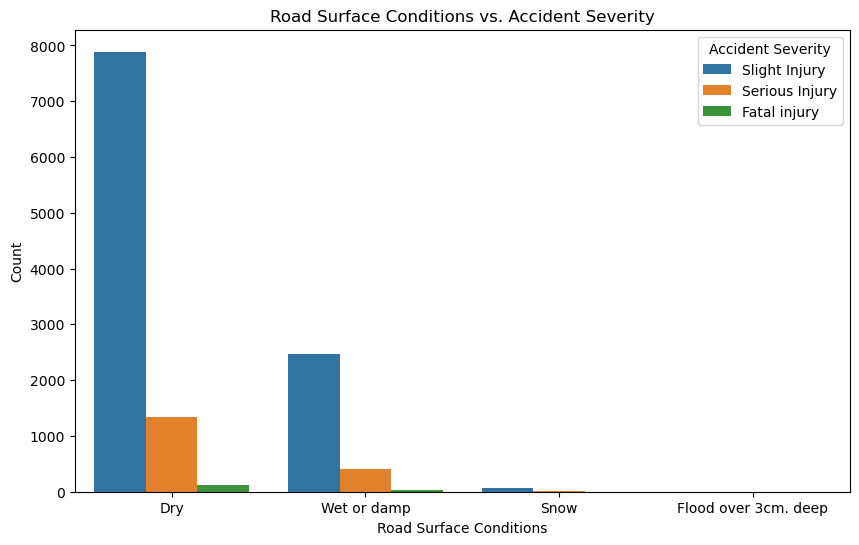

In [156]:
#Accident Severity with respect to Road Surface Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.title('Road Surface Conditions vs. Accident Severity')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Accident Severity')
plt.show()

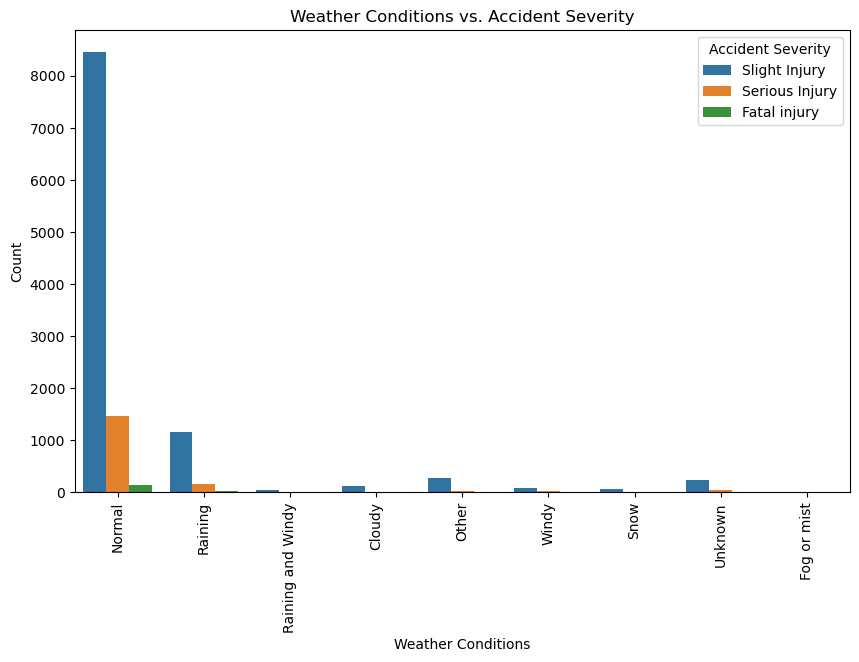

In [157]:
#Accident Severity with respect to Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df)
plt.title('Weather Conditions vs. Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Accident Severity')
plt.show()

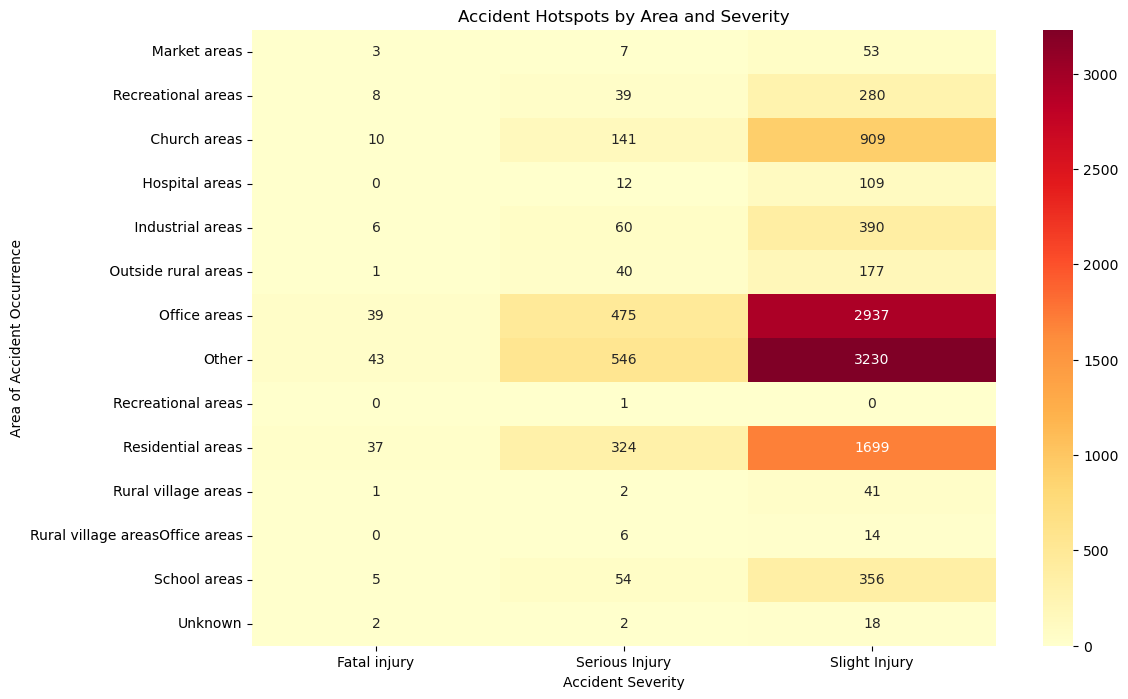

In [158]:
#Heatmap for accidents hotspots based on the area of occurrence
plt.figure(figsize=(12, 8))
hotspot_data = df.groupby(['Area_accident_occured', 'Accident_severity']).size().unstack(fill_value=0)
sns.heatmap(hotspot_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Accident Hotspots by Area and Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Area of Accident Occurrence')
plt.show()

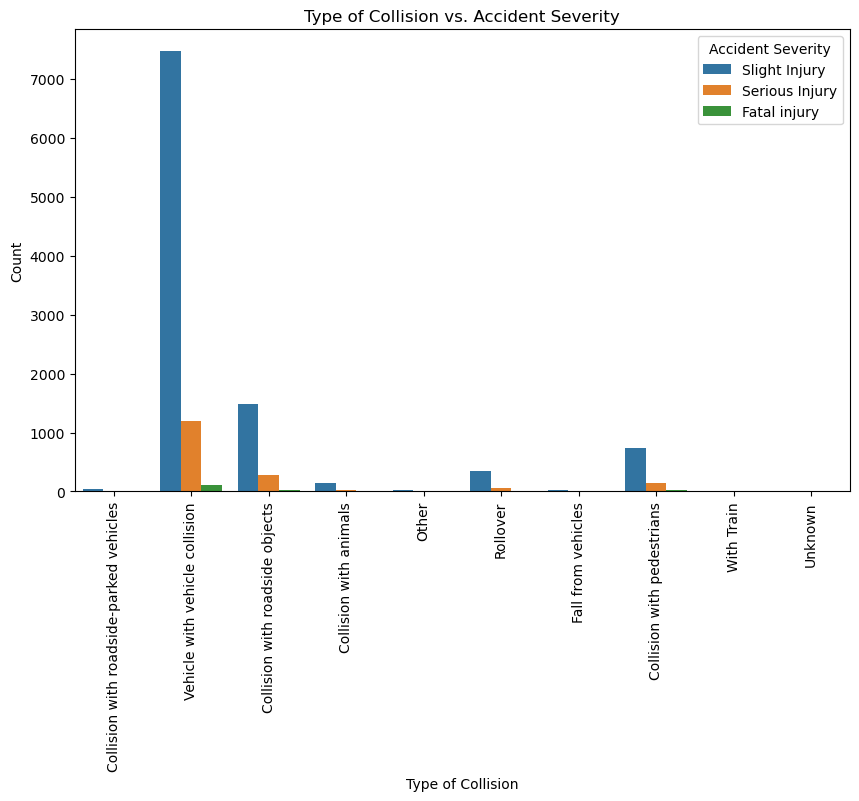

In [159]:
# Type of collision and accident severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision', hue='Accident_severity', data=df)
plt.title('Type of Collision vs. Accident Severity')
plt.xlabel('Type of Collision')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Accident Severity')
plt.show()

In [160]:
#correlation between Number of vehicles involved and Number of casualties
correlation = df['Number_of_vehicles_involved'].corr(df['Number_of_casualties'])
correlation

0.2134268214548039

In [161]:
corr_df = df[['Number_of_vehicles_involved', 'Number_of_casualties']]
corr_matrix = corr_df.corr()
corr_matrix

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


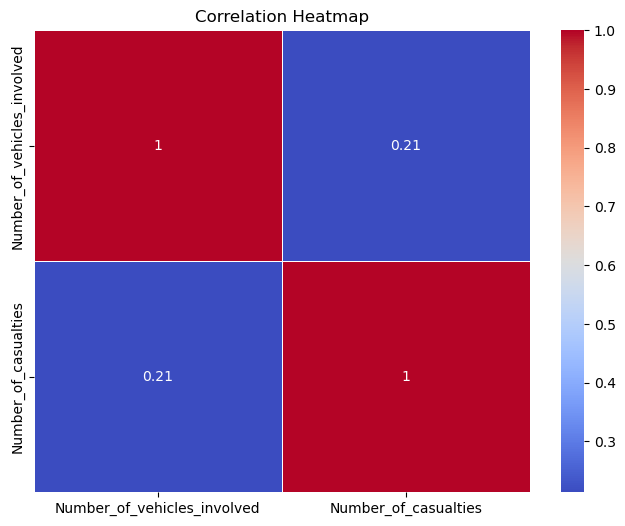

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

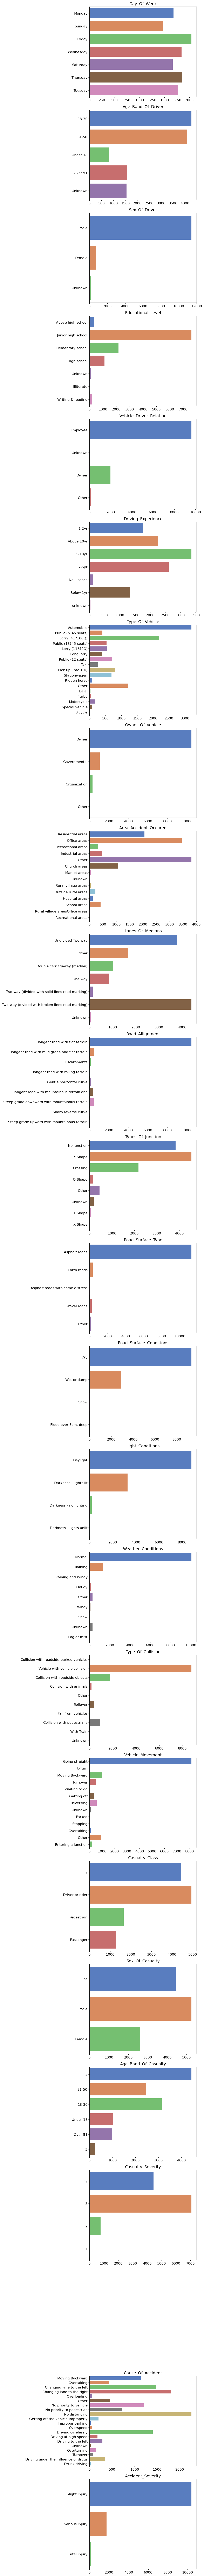

In [164]:
#Subplots for each categorical columns to visualize the categorical variables
categorical = [i for i in df.columns if df[i].dtype=='O']
num_cols = len(categorical)
fig_height = num_cols * 5
plt.figure(figsize=(10, fig_height))
plot_number = 1

for col in categorical:
    if plot_number <= num_cols and col != 'Pedestrian_movement':
        plt.subplot(num_cols, 1, plot_number)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plot_number += 1
plt.tight_layout()  
plt.show()

In [167]:
#converting categorical variables to numerical variables except the column Accident Severity
df1 = pd.DataFrame()
for col in categorical:
    if col != 'Accident_severity':
        df1[col] = LabelEncoder().fit_transform(df[col])

In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int32
 1   Age_band_of_driver       12316 non-null  int32
 2   Sex_of_driver            12316 non-null  int32
 3   Educational_level        12316 non-null  int32
 4   Vehicle_driver_relation  12316 non-null  int32
 5   Driving_experience       12316 non-null  int32
 6   Type_of_vehicle          12316 non-null  int32
 7   Owner_of_vehicle         12316 non-null  int32
 8   Area_accident_occured    12316 non-null  int32
 9   Lanes_or_Medians         12316 non-null  int32
 10  Road_allignment          12316 non-null  int32
 11  Types_of_Junction        12316 non-null  int32
 12  Road_surface_type        12316 non-null  int32
 13  Road_surface_conditions  12316 non-null  int32
 14  Light_conditions         12316 non-null  int32
 15  We

In [171]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,7,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,...,3,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
4,3,0,1,4,0,1,17,3,4,6,...,0,2,8,2,3,2,5,3,5,16


In [172]:
df1.tail()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
12311,6,1,1,7,0,1,4,3,5,4,...,3,2,8,2,3,2,5,3,5,10
12312,3,4,1,1,0,2,0,3,5,2,...,3,2,8,4,3,2,5,3,5,10
12313,3,2,1,4,0,2,1,3,5,2,...,3,2,8,4,0,1,1,2,5,1
12314,3,0,0,4,0,3,5,3,6,4,...,0,2,8,4,3,2,5,3,5,5
12315,3,0,1,4,0,2,7,3,5,4,...,0,2,8,8,2,0,2,2,1,1


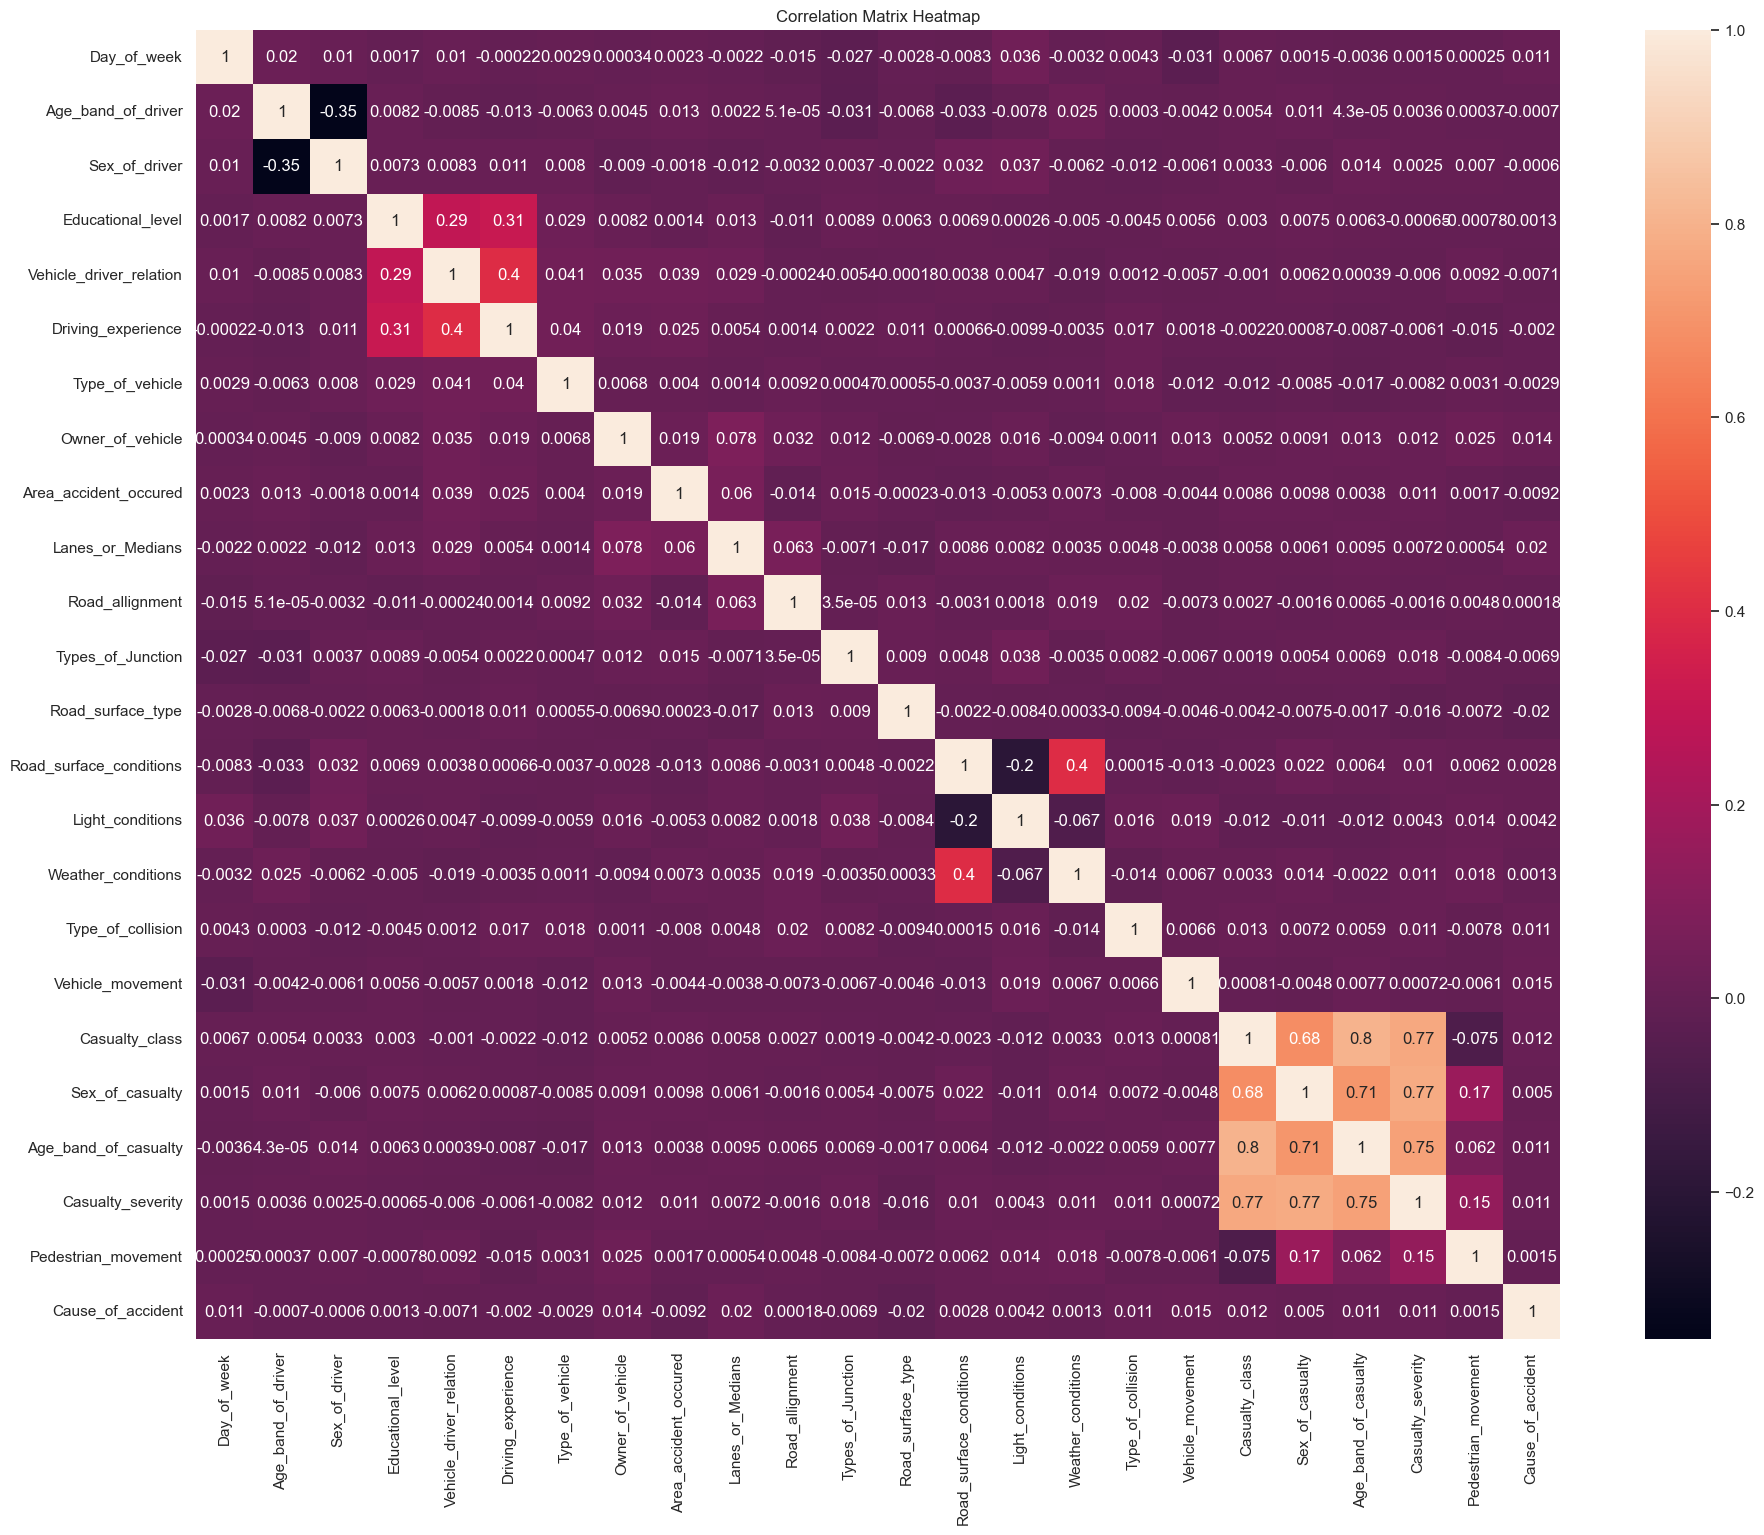

In [170]:
#heatmap for all the numerical variables that has been converted from categorical variables
plt.figure(figsize=(22, 17))
sns.set(font_scale=1) 
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [192]:
# Patterns related to road conditions, weather, and time of day
road_conditions_avg_casualties = df.groupby('Road_surface_conditions')['Number_of_casualties'].mean()
weather_conditions_avg_casualties = df.groupby('Weather_conditions')['Number_of_casualties'].mean()
print(road_conditions_avg_casualties)
print(weather_conditions_avg_casualties)

Road_surface_conditions
Dry                     1.50546
Flood over 3cm. deep    1.00000
Snow                    2.20000
Wet or damp             1.67011
Name: Number_of_casualties, dtype: float64
Weather_conditions
Cloudy               1.328000
Fog or mist          1.000000
Normal               1.539004
Other                1.527027
Raining              1.667168
Raining and Windy    1.425000
Snow                 1.967213
Unknown              1.448630
Windy                1.357143
Name: Number_of_casualties, dtype: float64


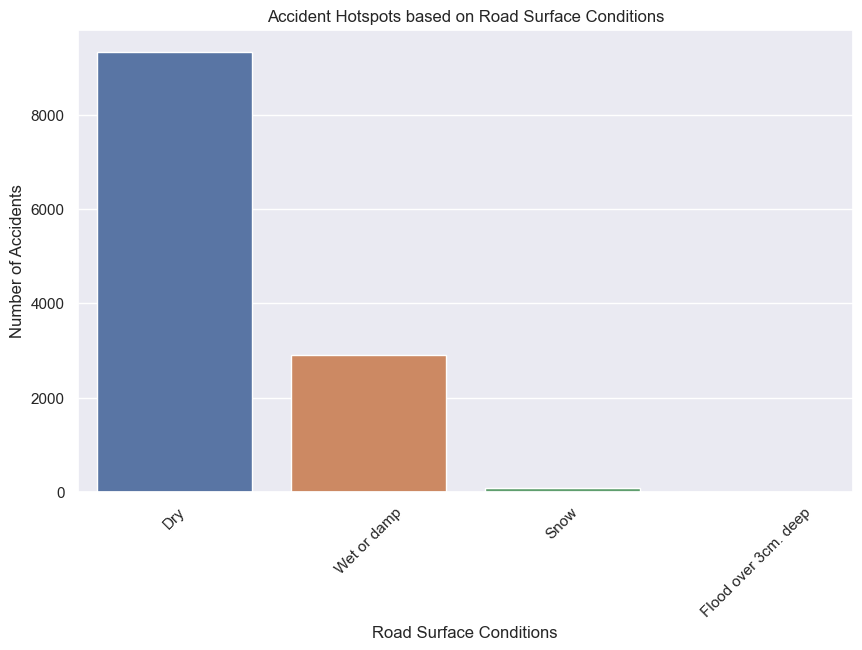

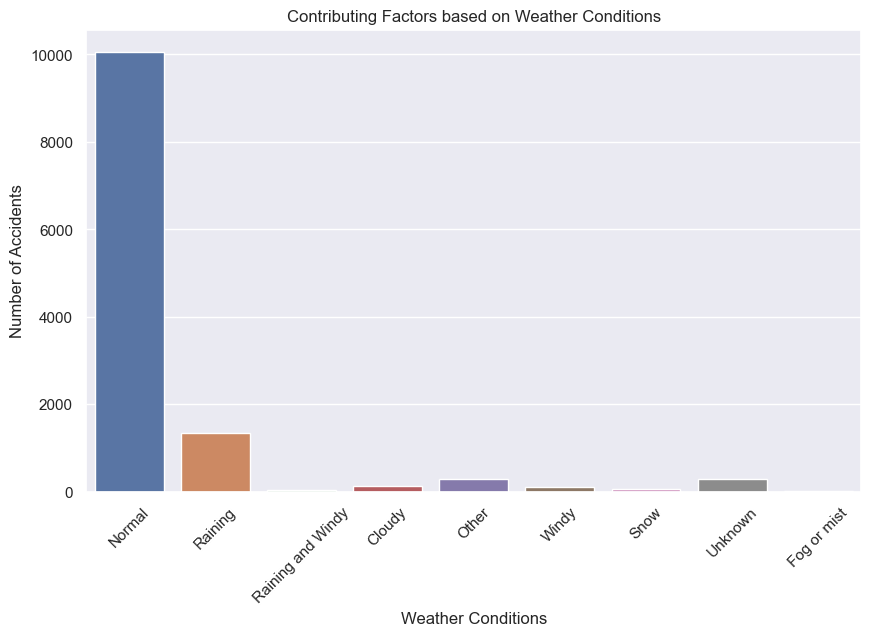

In [193]:
# Visualizing accident hotspots based on road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_conditions', data=df)
plt.title('Accident Hotspots based on Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Visualizing contributing factors based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=df)
plt.title('Contributing Factors based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()
